In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [3]:
df = pd.read_csv('store.csv')
df.head()

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [4]:
df.shape

(10000, 5)

In [5]:
df['reps'].unique()

array(['Chitra', 'Vijay', 'Mala', 'Suman', 'Rachna', 'Aash', 'Chand',
       'Suraj', 'Bala', 'Seet', 'Ravi', 'Anusha', 'Ananya', 'Jaggi',
       'Reva', 'Meena', 'Sai', 'Rahul', 'Ram', 'Prarth', 'Pooja', 'Rishi',
       'Ranga', 'Sesh', 'Shaanth', 'Bharath', 'Susan', 'Ratna', 'Easwar',
       'Prasad', 'Madhu', 'Suresh', 'Anahit', 'Sumedh', 'Manju',
       'Nandini', 'Santosh', 'Satyen', 'Vaghya', 'Palak', 'Aparna',
       'Jagdish', 'Vish', 'Kumar', 'John', 'Bhat', 'Hussain', 'Alka',
       'Rohini', 'Keshab', 'Nidhi', 'Satya', 'Venkat', 'Veeyes', 'Rajat',
       'Chandra', 'Kamat', 'Raji', 'Swami', 'Jay', 'Mukund', 'Priya',
       'Kishen', 'Vidya', 'Akila', 'Durga', 'Mak', 'Mehta', 'Javed',
       'Sruti', 'Mukesh', 'Kishore'], dtype=object)

There are total 72 representative are there.

In [14]:
df['product'].unique()

array(['Galaxy', 'Jet', 'Beacon', 'Alpen', 'Orbit', 'Trident', 'Mars',
       'Milka', 'Almond', 'Prince', 'Star', 'Halls'], dtype=object)

In [7]:
df['qty'].max(), df['qty'].min()

(25, 1)

In [8]:
df['revenue'].max(), df['revenue'].min()

(1998.75, 18.43)

In [9]:
df['region'].unique()

array(['West', 'North', 'East', 'South'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reps     10000 non-null  object 
 1   product  10000 non-null  object 
 2   qty      10000 non-null  int64  
 3   revenue  10000 non-null  float64
 4   region   10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [11]:
df.isnull().any()

reps       False
product    False
qty        False
revenue    False
region     False
dtype: bool

Luckily, there is no null values

## Data Visualization

Text(0, 0.5, 'count')

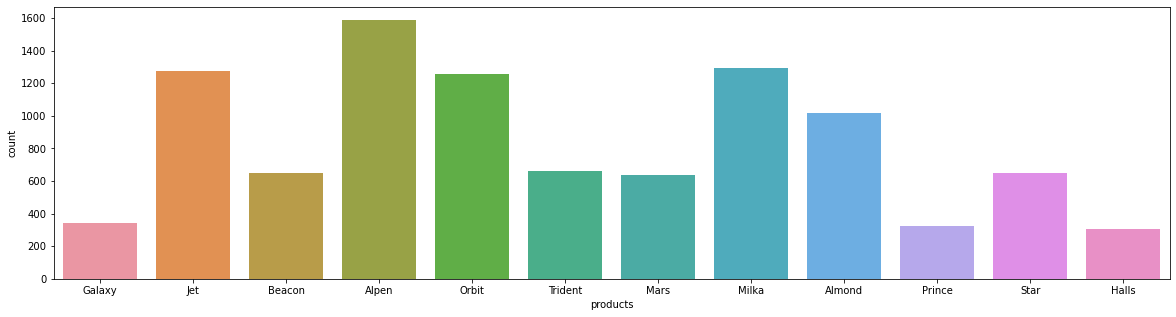

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(x='product', data=df);
plt.xlabel('products')
plt.ylabel('count')

Alpen, milka,...etc are large in amount and galaxy, prince, halls..are in less in amount.

In [15]:
#number of transaction made ny each reps
pd.value_counts(df['reps'], sort=True)

Seet       353
Rachna     318
Santosh    318
Aash       315
Vish       308
          ... 
Jay         84
Ram         84
Anusha      82
Sesh        81
Rohini      79
Name: reps, Length: 72, dtype: int64

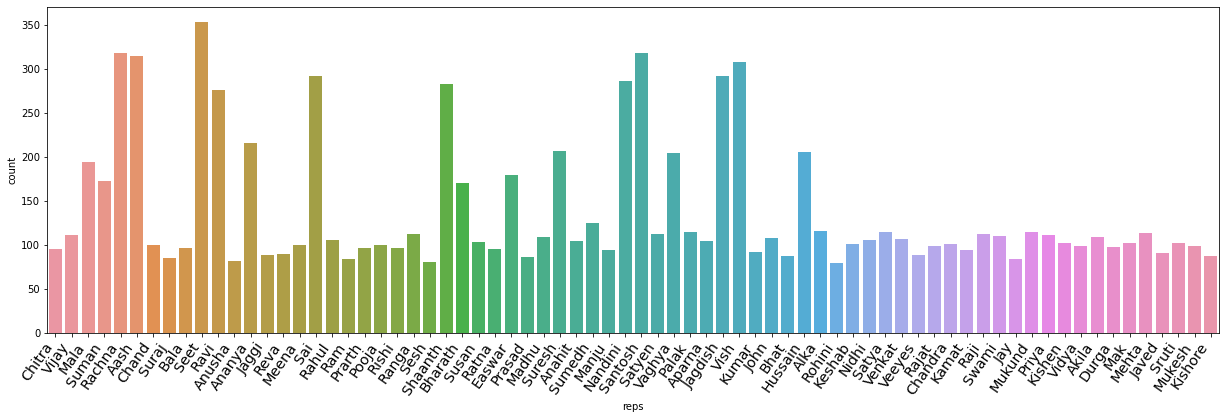

In [17]:
plt.figure(figsize=(21,6))
sns.countplot(x='reps', data=df);
plt.xticks(
    rotation=55, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

clearly vivsible that seet is making high transaction and rohini less.

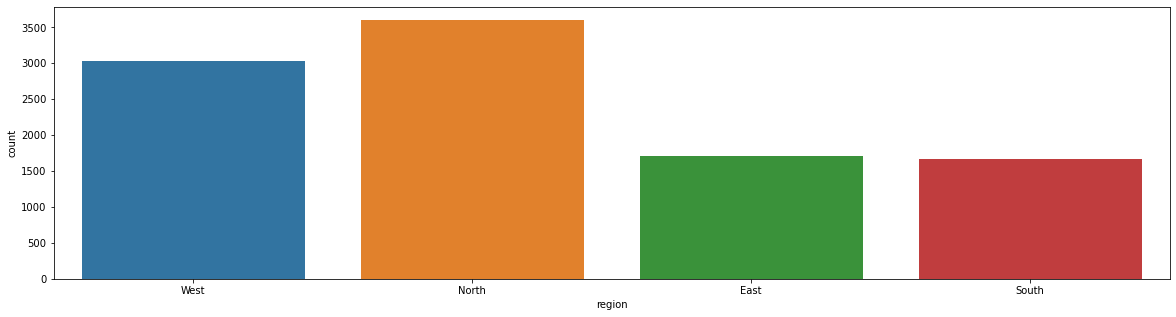

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='region', data=df);
plt.xlabel('region');
plt.ylabel('count');

Sales are large in north and west compared to east and south.

In [22]:
pd.pivot_table(df, index=['region', 'reps', 'product'], aggfunc=np.sum)[:12]

qty  revenue
region reps product              
East   Aash Almond   102  2535.02
            Alpen    186  6217.75
            Beacon    48  1190.76
            Galaxy    30  2378.10
            Halls     17   319.11
            Jet      145  2861.58
            Mars     173  4012.66
            Milka    127  2876.64
            Orbit    103  2323.66
            Prince    82  2221.74
            Star      62  1288.15
            Trident   60  1773.30

In [21]:
pd.pivot_table(df, index=['region', 'product'], aggfunc=np.sum)

qty   revenue
region product                
East   Almond    529  13091.62
       Alpen     903  30315.59
       Beacon    303   7492.95
       Galaxy    125   9906.96
       Halls     123   2310.05
       Jet       742  14643.30
       Mars      494  11485.13
       Milka     737  16702.79
       Orbit     759  17232.23
       Prince    208   5636.46
       Star      355   7366.55
       Trident   336   9957.90
North  Almond   1181  29196.74
       Alpen    1818  61158.69
       Beacon    703  17321.42
       Galaxy    434  34346.80
       Halls     346   6507.36
       Jet      1630  32173.26
       Mars      874  20351.72
       Milka    1434  32580.58
       Orbit    1536  34820.15
       Prince    474  12887.19
       Star      785  16305.08
       Trident   959  28460.55
South  Almond    541  13364.23
       Alpen    1027  34524.45
       Beacon    411  10178.19
       Galaxy    198  15667.34
       Halls     185   3474.92
       Jet       824  16254.69
       Mars      322   7485.44
       Milka     752  17068.95
       Orbit     713  16175.54
       Prince    203   5516.84
       Star      298   6190.96
       Trident   434  12918.30
West   Almond   1007  24929.32
       Alpen    1519  51153.34
       Beacon    735  18171.85
       Galaxy    393  30998.08
       Halls     315   5918.85
       Jet      1066  21006.31
       Mars      808  18787.31
       Milka    1230  27897.08
       Orbit    1367  31056.33
       Prince    368   9984.97
       Star      663  13775.40
       Trident   707  20952.45

We can see that in which region how much quantity and revenue are generated.

In [24]:
total_rev = df.groupby('reps')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

reps
Seet       35747.41
Aash       29998.47
Santosh    29801.71
Rachna     28263.75
Shaanth    27692.49
             ...   
Kamat       6536.68
Ram         5871.23
Anusha      5816.29
Veeyes      5623.93
Rohini      5440.15
Name: revenue, Length: 72, dtype: float64

In this we can observe that which reps are generating how much revenue.

In [25]:
df_w = df[df['region'] == 'West']
sales_west = df_w.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_n = df[df['region'] == 'North']
sales_north = df_n.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_e = df[df['region'] == 'East']
sales_east = df_e.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_s = df[df['region'] == 'South']
sales_south = df_s.groupby('reps')['revenue'].apply(lambda x: x.sum())

In [26]:
sales_north.nlargest(25)

reps
Rachna     28263.75
Shaanth    27692.49
Ravi       27448.79
Nandini    26569.57
Sai        24412.79
Ananya     18510.93
Suman      17274.12
Susan      13302.84
Ranga      11639.45
Kishore    11525.99
Mukund     10404.84
Aparna      9260.05
Venkat      9256.03
Rajat       9033.33
Prasad      8923.48
Vijay       8770.86
Pooja       8293.03
Chand       8279.43
Ratna       8211.12
Rishi       8032.94
Prarth      6775.08
Sesh        6627.87
Kamat       6536.68
Veeyes      5623.93
Rohini      5440.15
Name: revenue, dtype: float64

From this and making pivot_table we can see that which reps are generating how much revenue to the company in particular region

In [27]:
#revenue generated by the reps in each region
print('Number of Reps - South region:', sales_south.size, 'Revenue generated is:', sales_south.sum())
print('Number of Reps - West region:', sales_west.size,  'Revenue generated is:', sales_west.sum())
print('Number of Reps - North region:', sales_north.size, 'Revenue generated is:', sales_north.sum())
print('Number of Reps - East region:', sales_east.size, 'Revenue generated is:', sales_east.sum())

Number of Reps - South region: 12 Revenue generated is: 158819.84999999998
Number of Reps - West region: 23 Revenue generated is: 274631.29
Number of Reps - North region: 25 Revenue generated is: 326109.54000000004
Number of Reps - East region: 12 Revenue generated is: 146141.53


In [28]:
total_rev.sum()

905702.21

Total 905702.21 rs are generated by all the reps covering all 12 brands in all regions.

In [30]:
product_sold = df.groupby('product')['qty'].apply(lambda x: x.sum())
product_sold.sort_values(ascending=False)

product
Alpen      5267
Orbit      4375
Jet        4262
Milka      4153
Almond     3258
Mars       2498
Trident    2436
Beacon     2152
Star       2101
Prince     1253
Galaxy     1150
Halls       969
Name: qty, dtype: int64

Total quantity sold for each product

In [31]:
product_rev = df.groupby('product')['revenue'].apply(lambda x: x.sum())
product_rev.sort_values(ascending=False)

product
Alpen      177152.07
Orbit       99284.25
Milka       94249.40
Galaxy      90919.18
Jet         84077.56
Almond      80581.91
Trident     72289.20
Mars        58109.60
Beacon      53164.41
Star        43637.99
Prince      34025.46
Halls       18211.18
Name: revenue, dtype: float64

we can see that each product generating diff revenue.

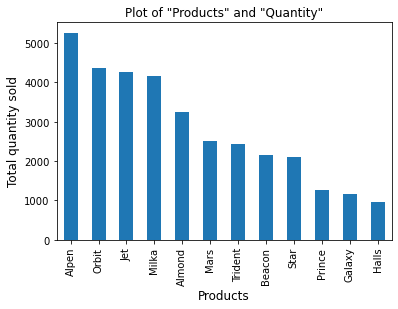

In [33]:
df.groupby(['product']).qty.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total quantity sold', fontsize=12)
plt.title('Plot of "Products" and "Quantity"');

Alpen is sold highest in quantity so it is producing high revenue to the company.

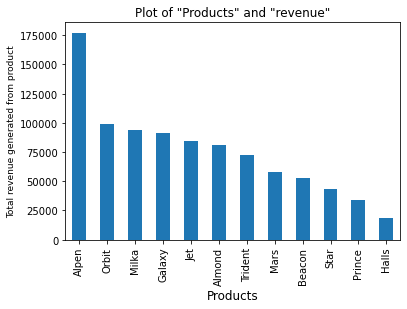

In [35]:
df.groupby(['product']).revenue.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total revenue generated from product', fontsize=9)
plt.title('Plot of "Products" and "revenue"');

we can see clearly the above mention point.

In [36]:
df_s1 = pd.DataFrame(product_sold)
df_s1.reset_index
df_s2 = pd.DataFrame(product_rev)
df_total = pd.concat([df_s1, df_s2], axis=1)
df_total.reset_index(inplace=True)

In [37]:
df_total

,product,qty,revenue
0,Almond,3258,80581.91
1,Alpen,5267,177152.07
2,Beacon,2152,53164.41
3,Galaxy,1150,90919.18
4,Halls,969,18211.18
5,Jet,4262,84077.56
6,Mars,2498,58109.60
7,Milka,4153,94249.40
8,Orbit,4375,99284.25
9,Prince,1253,34025.46


In [38]:
df_total['unit_price'] = df_total.revenue / df_total.qty
df_total

,product,qty,revenue,unit_price
0,Almond,3258,80581.91,24.733551
1,Alpen,5267,177152.07,33.634340
2,Beacon,2152,53164.41,24.704651
3,Galaxy,1150,90919.18,79.060157
4,Halls,969,18211.18,18.793787
5,Jet,4262,84077.56,19.727255
6,Mars,2498,58109.60,23.262450
7,Milka,4153,94249.40,22.694293
8,Orbit,4375,99284.25,22.693543
9,Prince,1253,34025.46,27.155196


Now it is clearly seen that why people is buying Galaxy product, 1 unit is 79.1 rs so

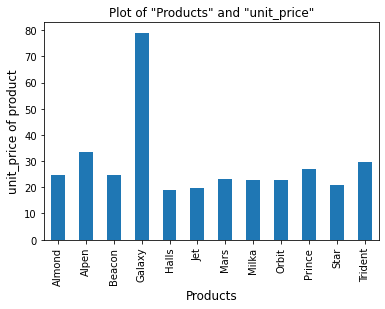

In [39]:
df_total.groupby('product')['unit_price'].apply(lambda x:x.sum()).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('unit_price of product', fontsize=12)
plt.title('Plot of "Products" and "unit_price"');

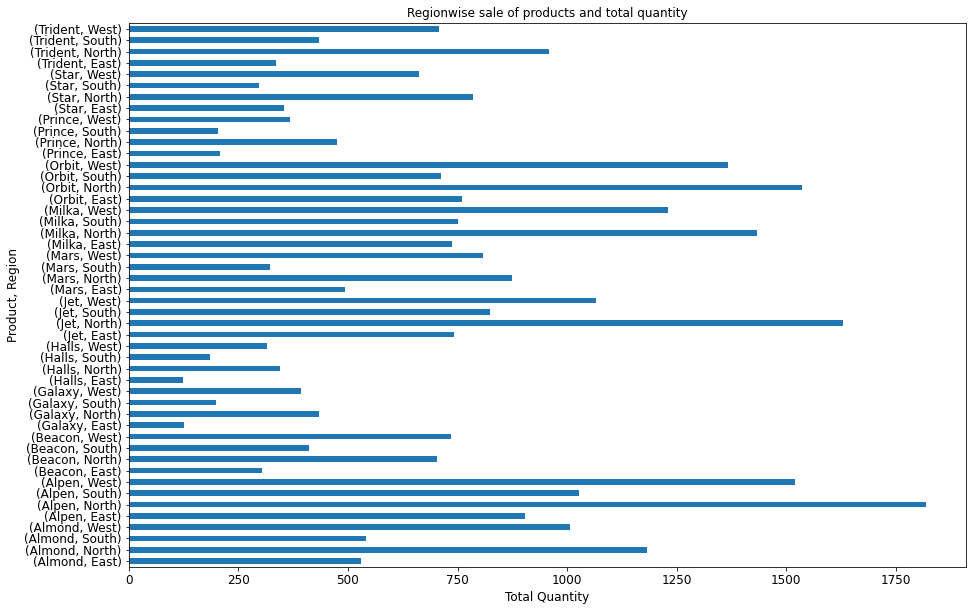

In [41]:
region_p = df.groupby(['product', 'region'])['qty'].apply(lambda x: x.sum())
region_p.plot(kind='barh', fontsize=12,figsize=(15,10) )
plt.title('Regionwise sale of products and total quantity')
plt.ylabel('Product, Region', fontsize=12)
plt.xlabel('Total Quantity', fontsize=12);

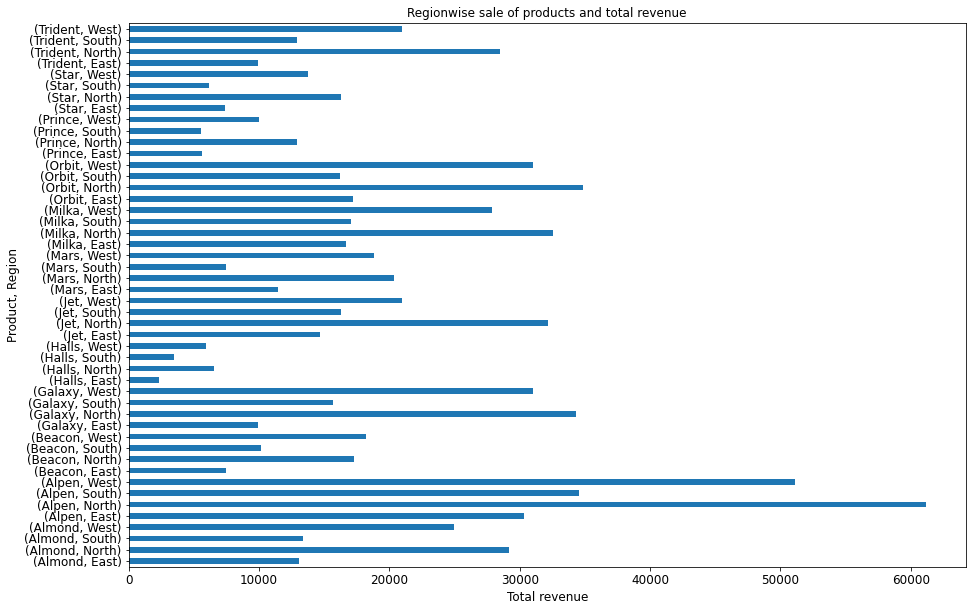

In [42]:
region_p = df.groupby(['product', 'region'])['revenue'].apply(lambda x: x.sum())
region_p.plot(kind='barh', fontsize=12,figsize=(15,10) )
plt.title('Regionwise sale of products and total revenue')
plt.ylabel('Product, Region', fontsize=12)
plt.xlabel('Total revenue', fontsize=12);

## K-means Clustering

In [44]:
#encoding the region data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df['region'] = le.fit_transform(df['region'])
df.tail()

,reps,product,qty,revenue,region
9995,Sumedh,Jet,12,233.42,3
9996,Mala,Almond,2,48.50,3
9997,Santosh,Almond,1,25.00,3
9998,Ananya,Trident,2,59.40,1
9999,Sumedh,Milka,1,22.61,3


In [49]:
cols = ['qty', 'revenue']
df_cols = df[cols]
x = df_cols.iloc[:,[0,1]].values
x[:3]

array([[  2.  , 155.1 ],
       [  2.  ,  39.3 ],
       [  3.  ,  74.25]])

In [50]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters=4)

km.fit(x)

KMeans(n_clusters=4)

In [52]:
print(km.labels_)

[0 0 0 ... 0 0 0]


In [53]:
colors = ['red', 'blue', 'green', 'brown']
pred_color = [colors[label] for label in km.labels_]

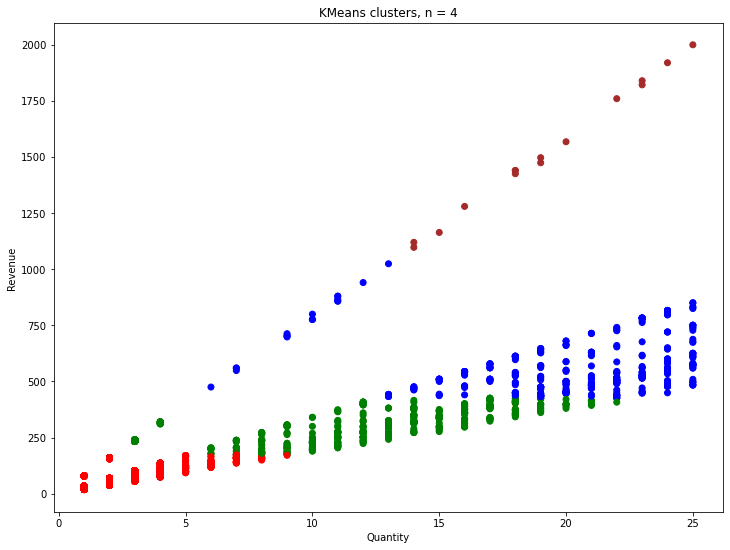

In [54]:
plt.figure(figsize=(12,9))
plt.scatter(x[:, 0], x[:, 1], c=pred_color)
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n = 4');

As quantity increases the revenue also increases

In [55]:
cols1 = ['region', 'revenue']
df1 = df[cols1]
X1 = df1.iloc[:,[0,1]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X1)

KMeans(n_clusters=6)

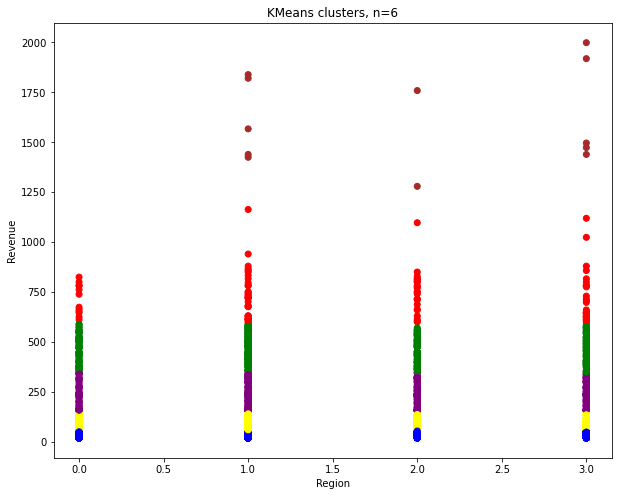

In [56]:
colors = ['blue', 'green','purple','brown', 'yellow','red']
pred_colors = [colors[label] for label in km.labels_]

plt.figure(figsize=(10,8))
plt.scatter(X1[:, 0], X1[:, 1], c=pred_colors)
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n=6');

In north and west the revenue is largest whereas in south ane east revenue is low.

In [57]:
cols1 = ['region', 'qty']
df2 = df[cols1]
X2 = df2.iloc[:,[0,1]].values
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X2)

KMeans(n_clusters=4)

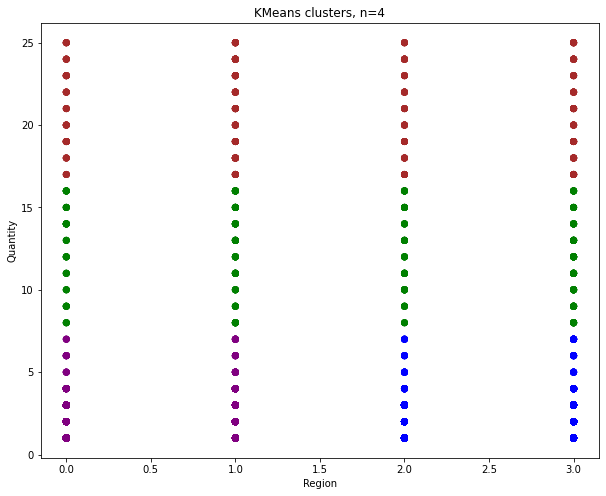

In [58]:
colors = ['blue', 'green','purple','brown']
pred_colors = [colors[label] for label in km.labels_]

plt.figure(figsize=(10,8))
plt.scatter(X2[:, 0], X2[:, 1], c=pred_colors)
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.title('KMeans clusters, n=4');

In different region different quantity is produced